# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
def kmeans_guc(data):
  # set the range of K values to try
  Ks = range(2, 10)

  # initialize empty lists to store results
  cluster_labels = []
  distortions = []
  silhouette_scores = []

  # loop over each value of K
  for K in Ks:
      # fit k-means model with K clusters
      model = KMeans(n_clusters=K)
      model.fit(data)
      
      # append the results to the lists
      cluster_labels.append(model.labels_)
      distortions.append(model.inertia_)
      silhouette_scores.append(silhouette_score(data, model.labels_))

  # choose the best K based on silhouette score
  best_K = Ks[np.argmax(silhouette_scores)]
  best_silhouette_score = max(silhouette_scores)
  print('Best K:', best_K)
  print('Best Silhouette Score:', best_silhouette_score)

In [ ]:
def hierarchical(data):  
  from sklearn.cluster import AgglomerativeClustering
  from scipy.cluster.hierarchy import dendrogram, linkage
  import matplotlib.pyplot as plt
  from sklearn.metrics import silhouette_score


  # set the range of distance thresholds to try
  thresholds = [0.1, 0.25, 0.5, 0.75, 1]

  # set the range of affinity and linkage parameters to try
  affinities = ['euclidean', 'manhattan', 'cosine']
  linkages = ['average', 'single']

  # initialize empty lists to store results
  dendrograms = []
  silhouette_scores = []
  best_score = -1

  # loop over each combination of parameters
  try:
    for affinity in affinities:
        for linkage_type in linkages:
            for threshold in thresholds:
                # fit agglomerative clustering model with the current parameters
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity,
                                                linkage=linkage_type, distance_threshold=threshold)
                model.fit(data)

                # calculate and store the silhouette score for the current parameters
                score = silhouette_score(data, model.labels_)
                silhouette_scores.append(score)

                # if the current score is the best so far, store the dendrogram for this model
                if score > best_score:
                    best_score = score
                    best_model = model
                    best_params = {'affinity': affinity, 'linkage': linkage_type, 'threshold': threshold}

               
  except:
    pass

  
  print('Best Parameters:', best_params)
  print('Best Silhouette Score:', best_score)



In [ ]:
def dbscan(data):  
  from sklearn.cluster import DBSCAN
  from sklearn.metrics import silhouette_score
  import matplotlib.pyplot as plt

  # define the range of values for EPS and min_samples
  eps_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
  min_samples_values = [5, 10, 15, 20, 25]

  # initialize an empty dictionary to store silhouette scores for each parameter combination
  silhouette_scores = {}

  # loop over all combinations of EPS and min_samples values
  for eps in eps_values:
      for min_samples in min_samples_values:
          # initialize a DBSCAN object with current parameters
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          # fit the model to the data
          dbscan.fit(data)
          # calculate the silhouette score for the current parameter combination
          if len(set(dbscan.labels_)) > 1:
              score = silhouette_score(data, dbscan.labels_)
              # store the score in the dictionary
              silhouette_scores[(eps, min_samples)] = score

  # find the best parameters based on the highest silhouette score
  best_params = max(silhouette_scores, key=silhouette_scores.get)
  print('Best Parameters:', best_params)
  print('Best Silhouette Score:', silhouette_scores[best_params])



In [ ]:
def mixture(data):  
  from sklearn.mixture import GaussianMixture
  import matplotlib.pyplot as plt
  import numpy as np

  # define the range of covariance types to try
  cov_types = ['full', 'tied', 'diag', 'spherical']

  # initialize an empty dictionary to store GMM models for each covariance type
  gmms = {}
  silhouette_scores=[]
  best_score=-1
  # loop over all covariance types
  for cov_type in cov_types:
      # initialize a GMM object with current covariance type
      gmm = GaussianMixture(n_components=2, covariance_type=cov_type)
      # fit the model to the data
      gmm.fit(data)
      # store the model in the dictionary
      gmms[cov_type] = gmm

      score = silhouette_score(data, gmm.predict(data))
      silhouette_scores.append(score)

              
      if score > best_score:
            best_score = score

 
  print("best score:")
  print(best_score)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



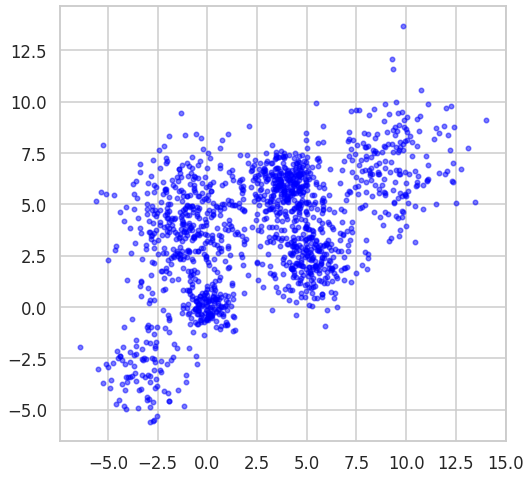

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [ ]:
from sklearn.metrics import silhouette_score

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

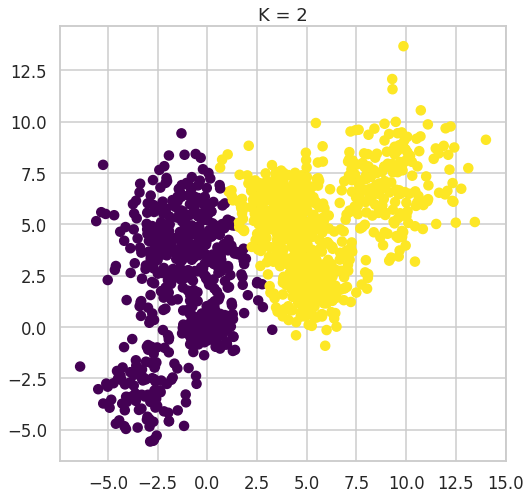

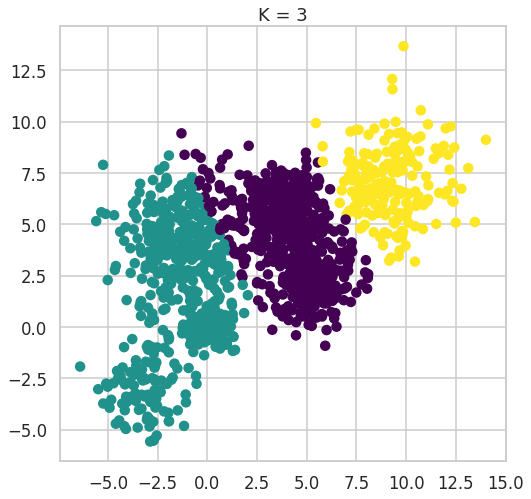

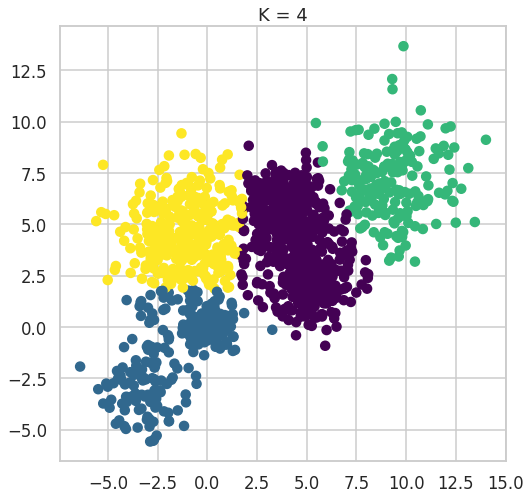

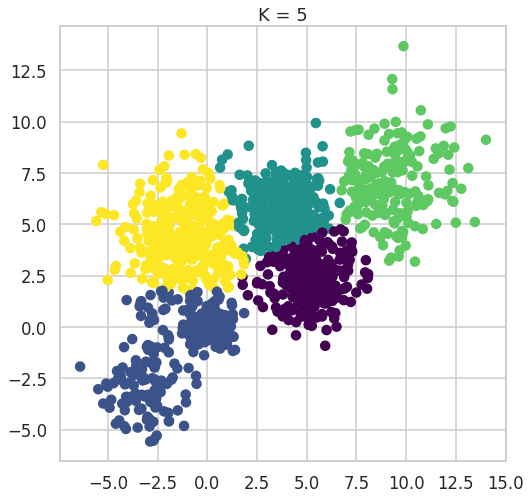

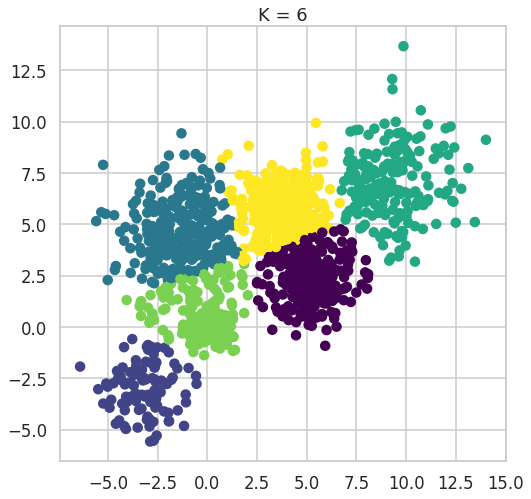

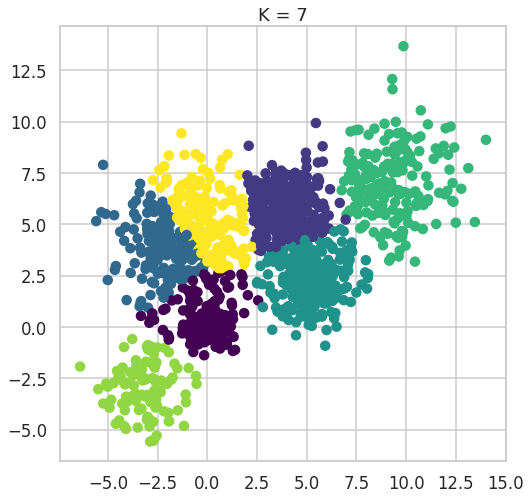

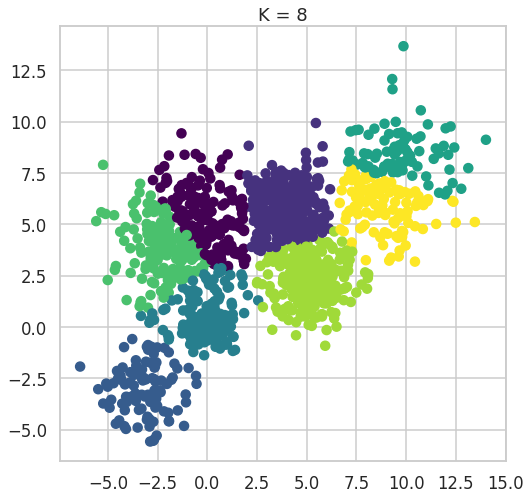

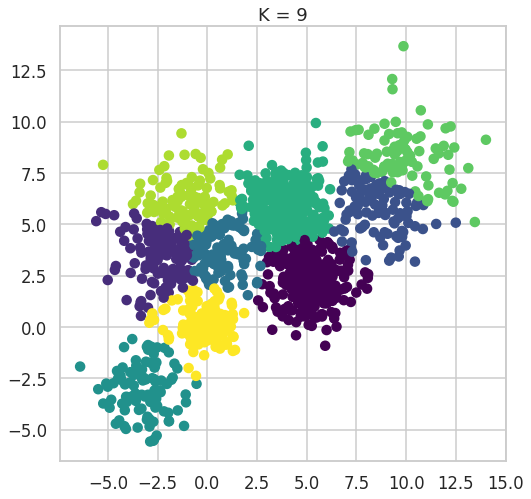

In [ ]:
# set the range of K values to try
Ks = range(2, 10)

# initialize empty lists to store results
cluster_labels = []
distortions = []
silhouette_scores = []

# loop over each value of K
for K in Ks:
    # fit k-means model with K clusters
    model = KMeans(n_clusters=K)
    model.fit(Multi_blob_Data)
    
    # append the results to the lists
    cluster_labels.append(model.labels_)
    distortions.append(model.inertia_)
    silhouette_scores.append(silhouette_score(Multi_blob_Data, model.labels_))

    # plot the clustering result for the current K
    plt.figure()
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=model.labels_, cmap='viridis')
    plt.title('K = ' + str(K))


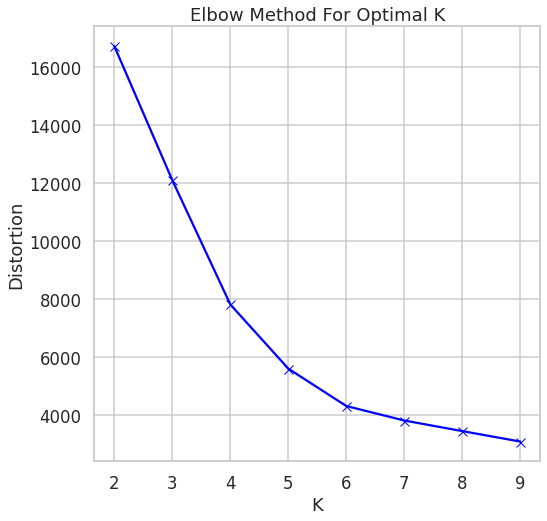

In [ ]:
# plot the distortion values for each K
plt.figure()
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


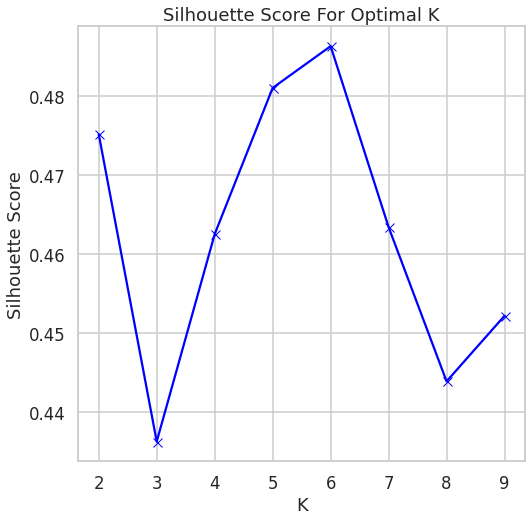

In [ ]:
# plot the silhouette score values for each K
plt.figure()
plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.show()

In [ ]:
# choose the best K based on silhouette score
best_K = Ks[np.argmax(silhouette_scores)] # after deriving the best score get its K value
best_silhouette_score = max(silhouette_scores)
print('Best K:', best_K)
print('Best Silhouette Score:', best_silhouette_score)

Best K: 6
Best Silhouette Score: 0.4862794240733028


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

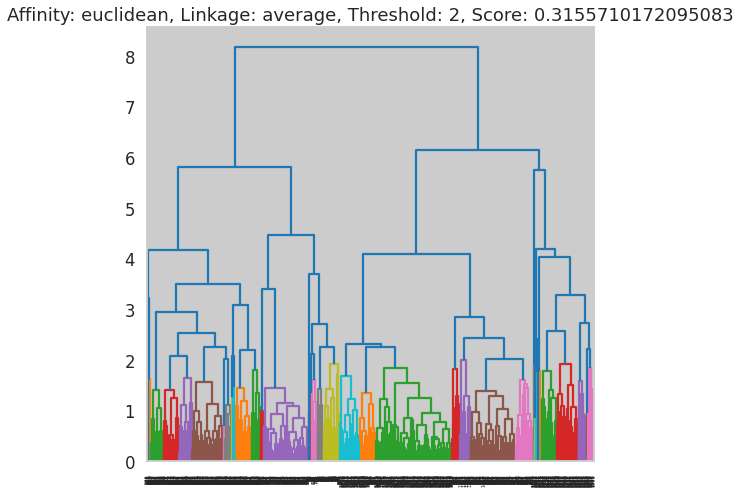

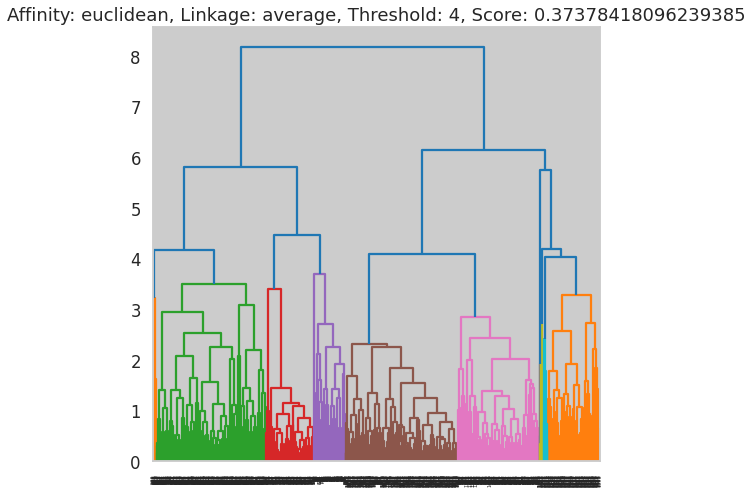

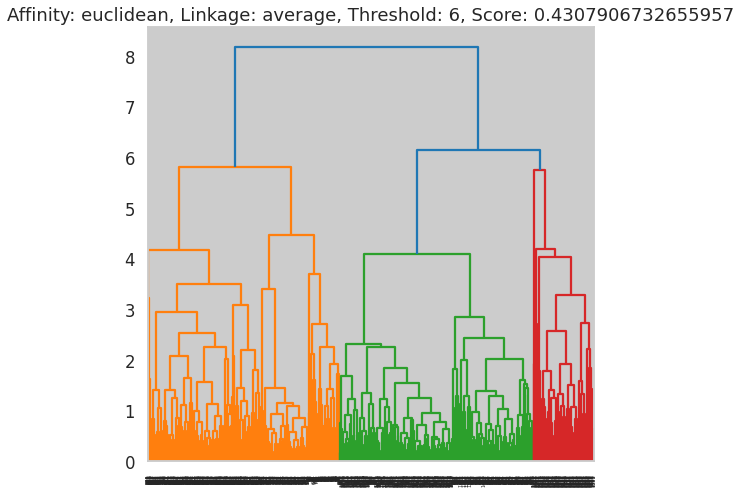

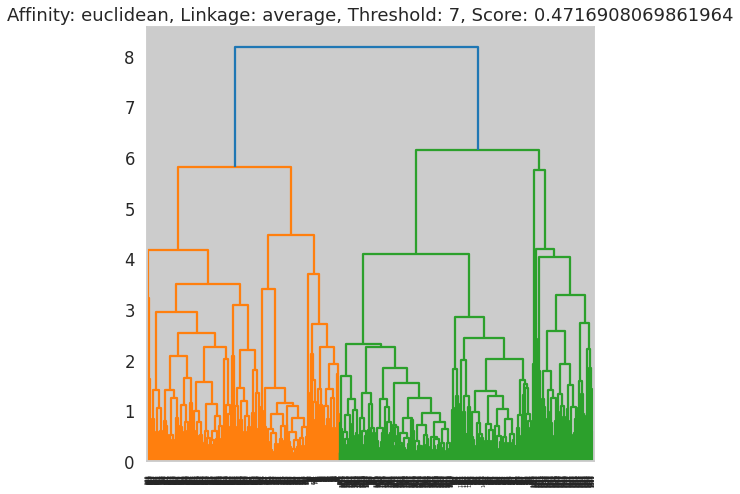

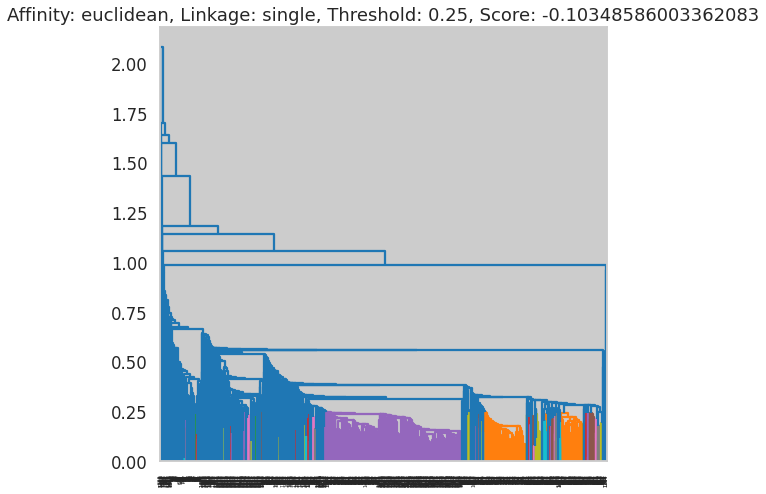

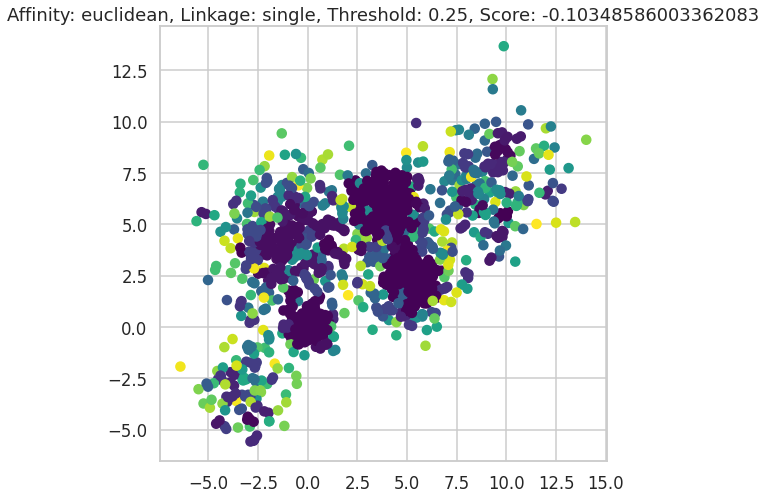

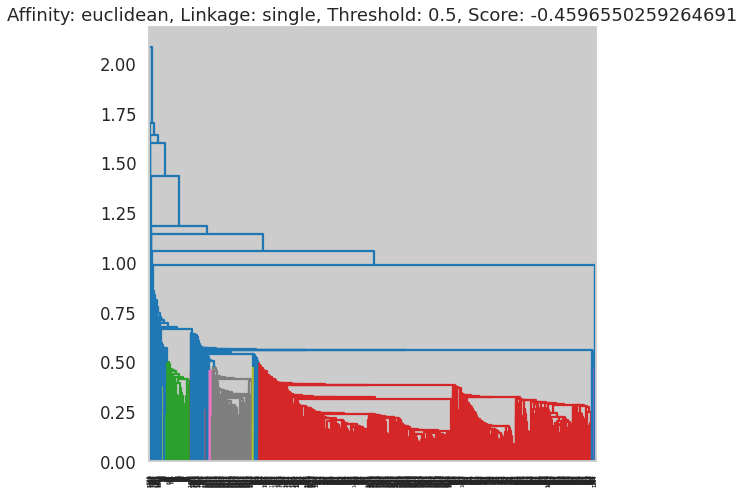

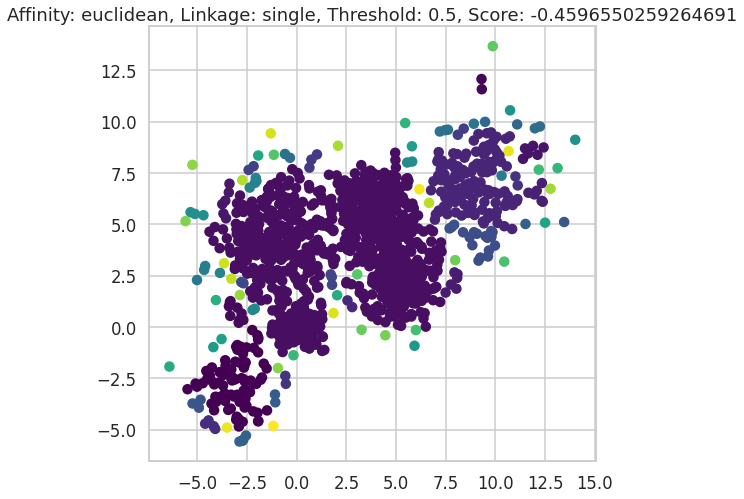

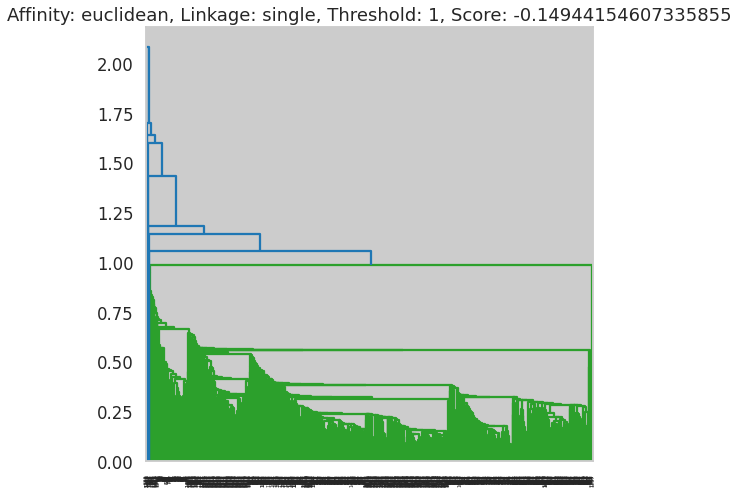

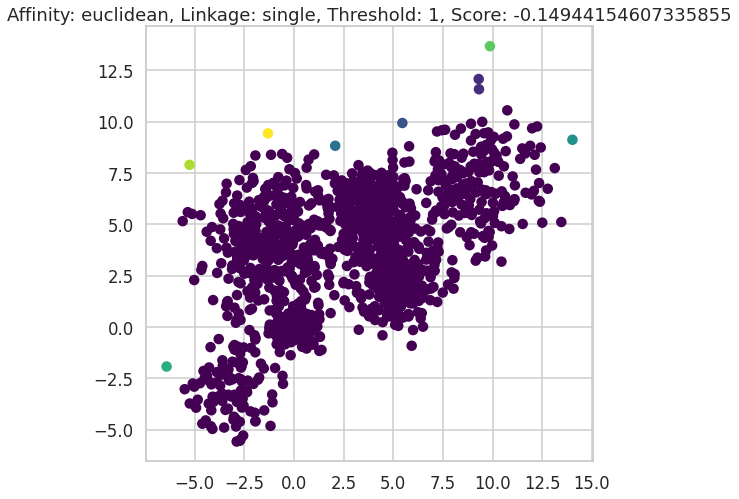

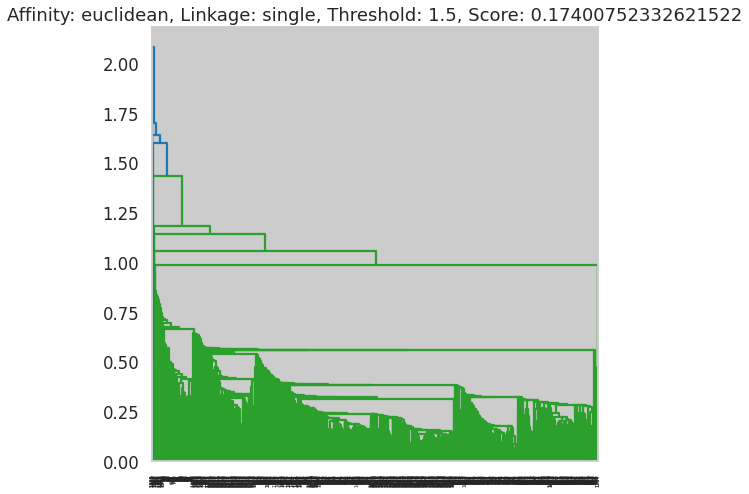

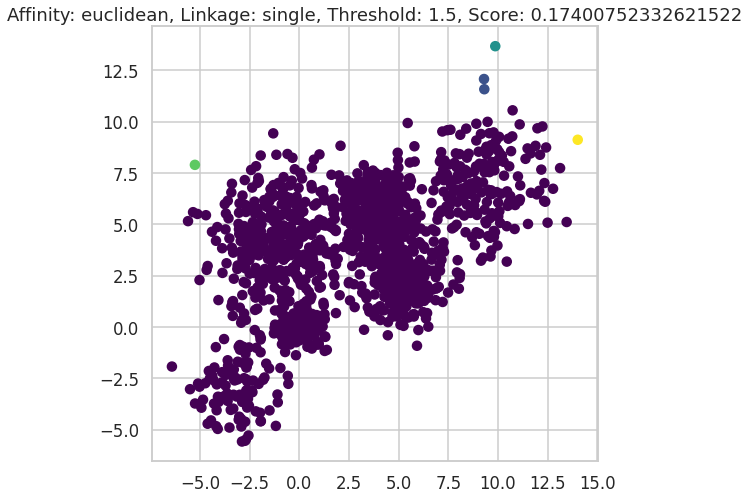

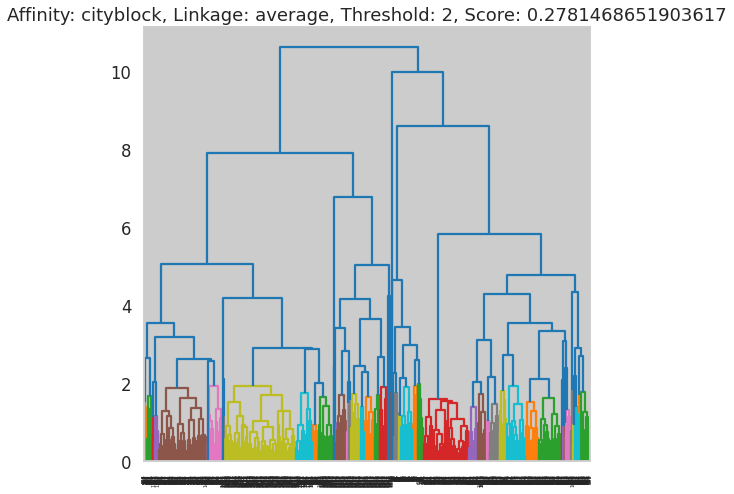

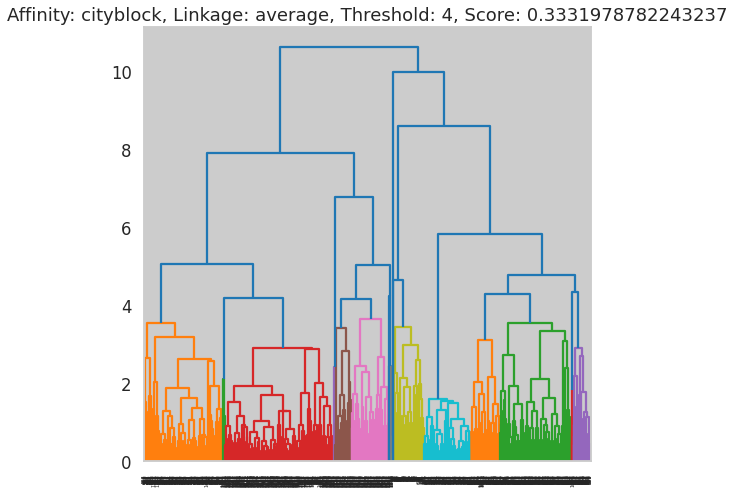

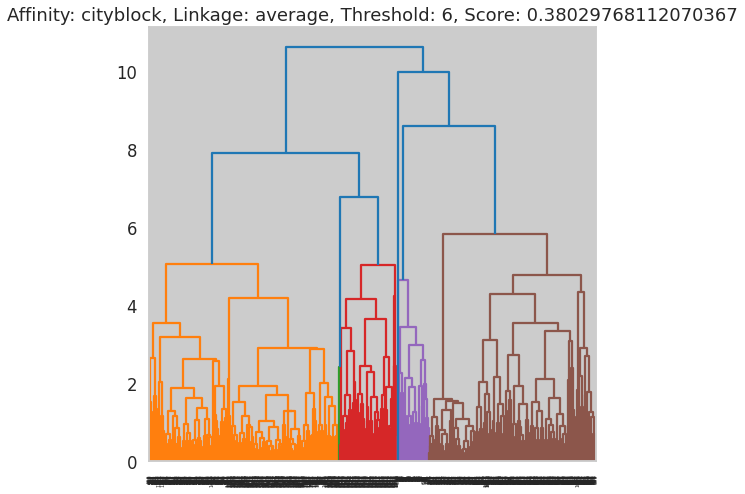

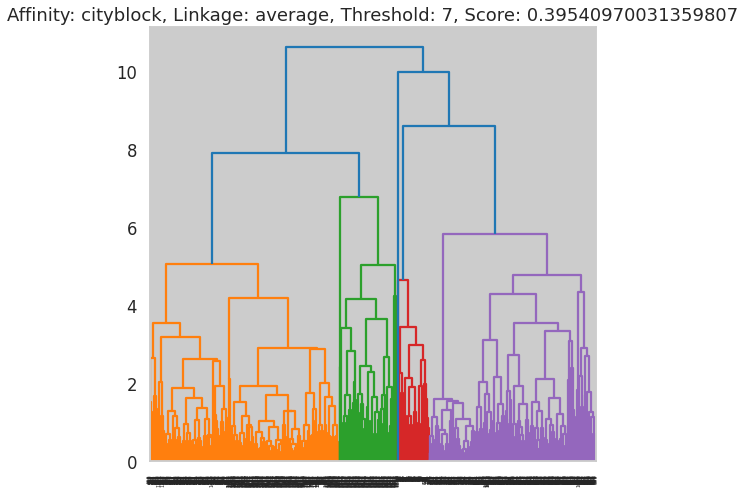

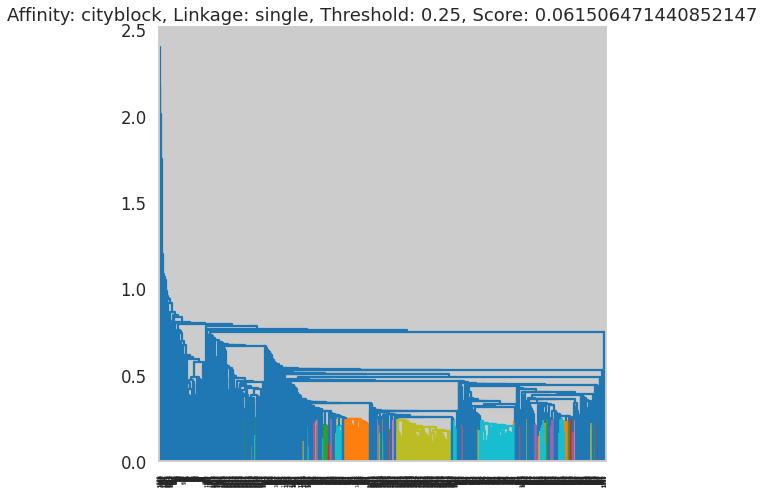

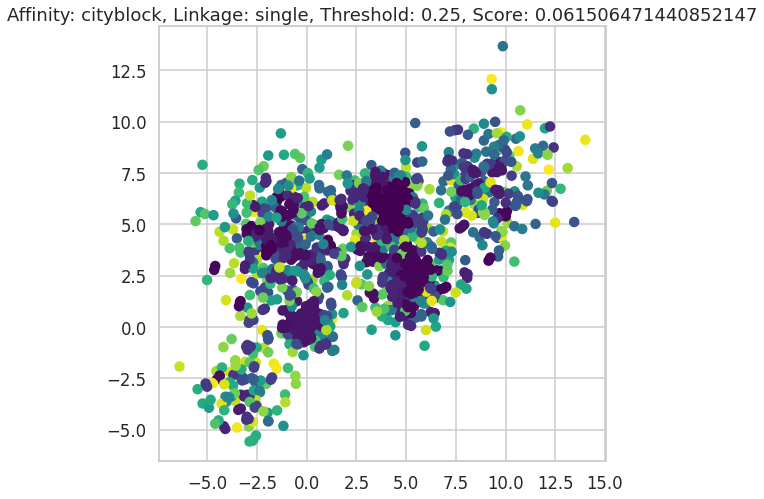

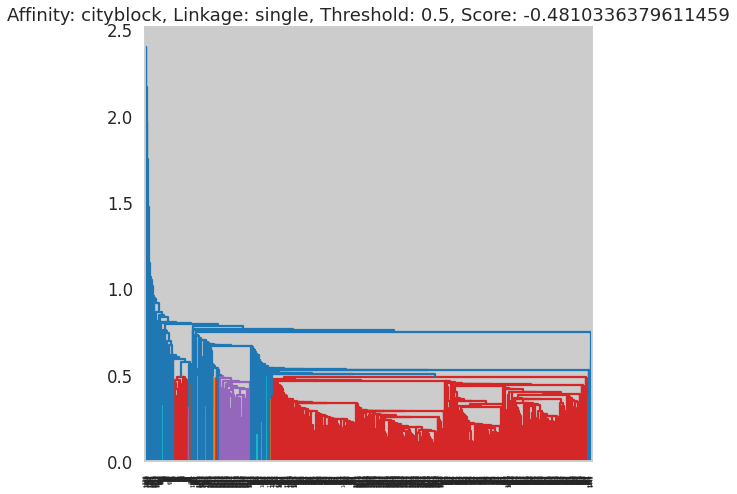

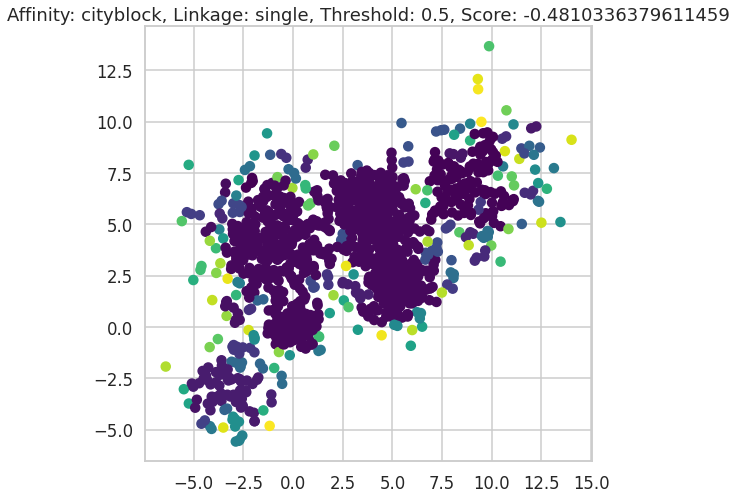

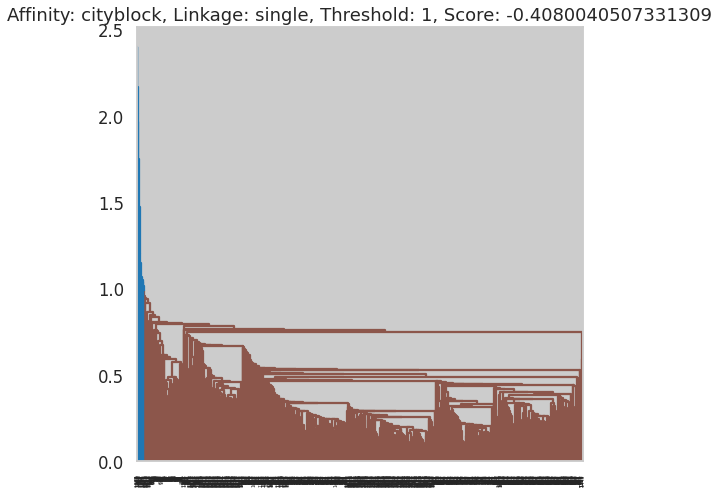

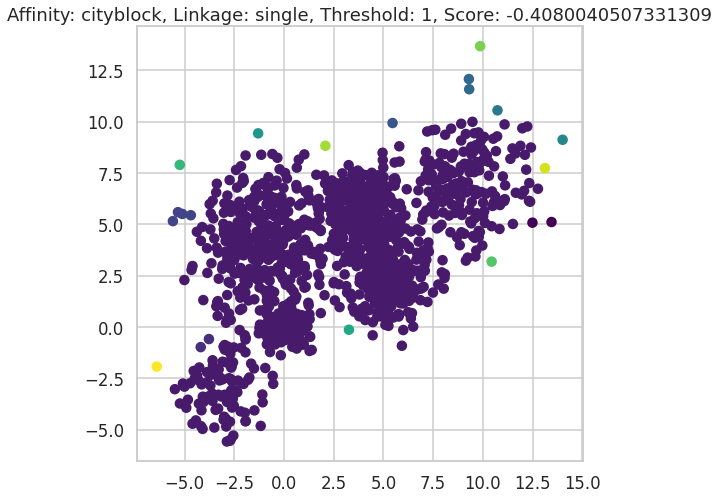

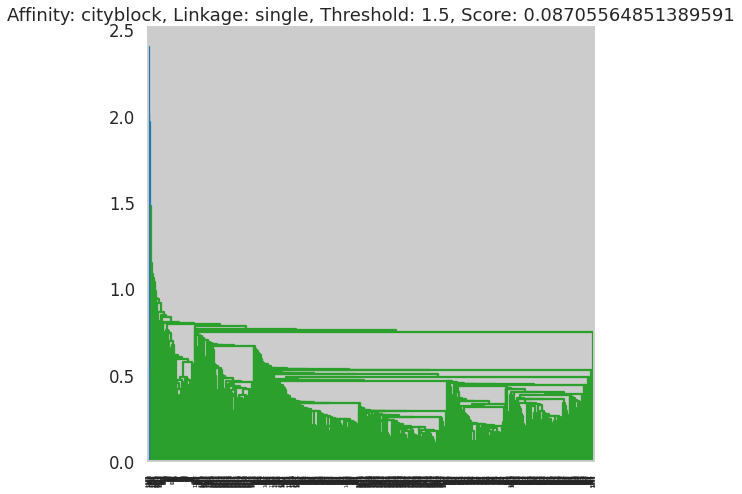

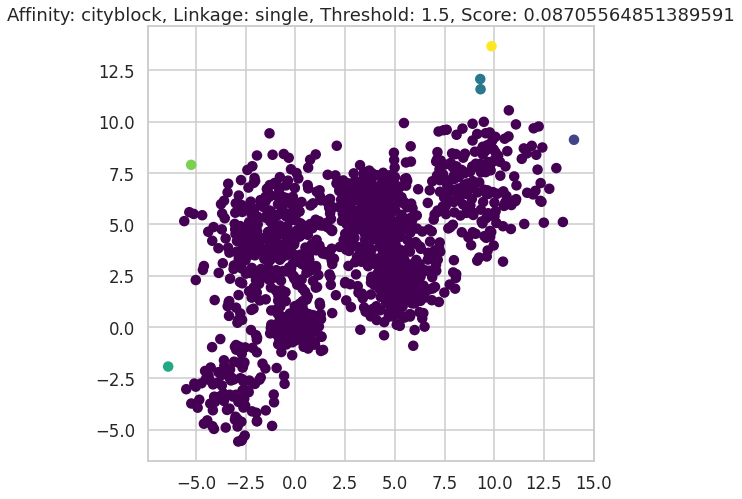

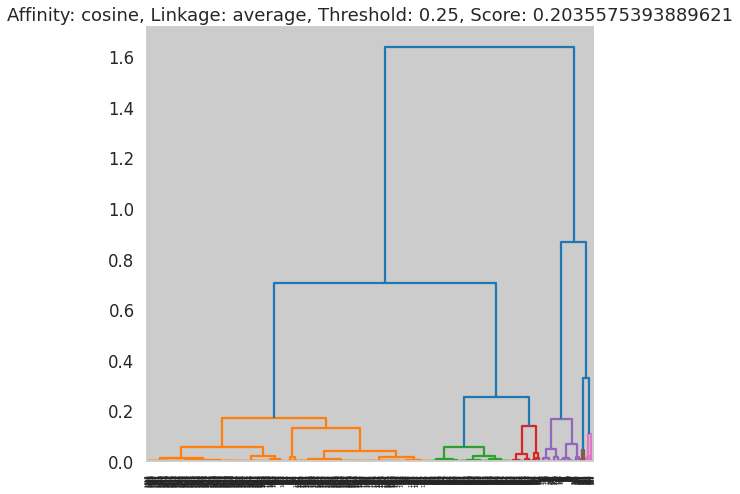

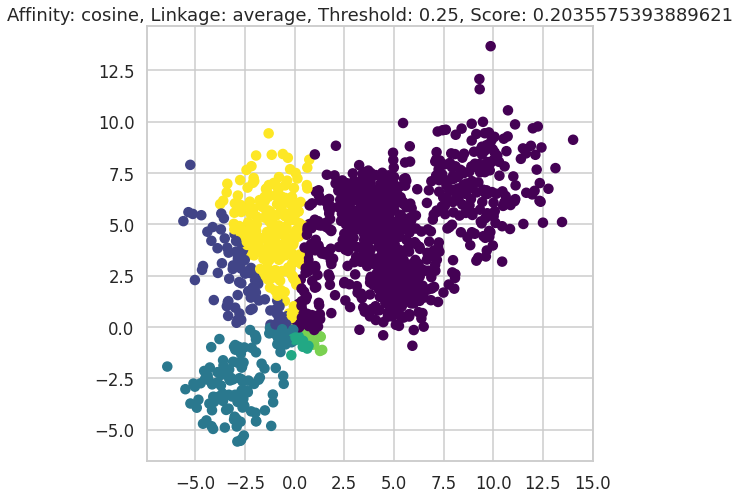

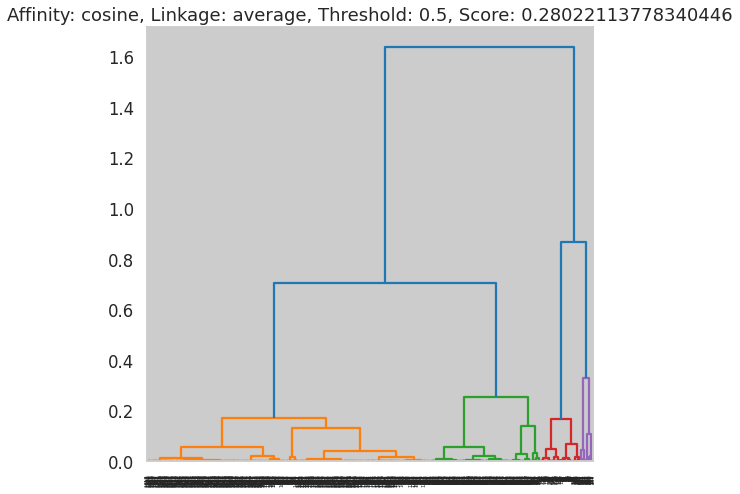

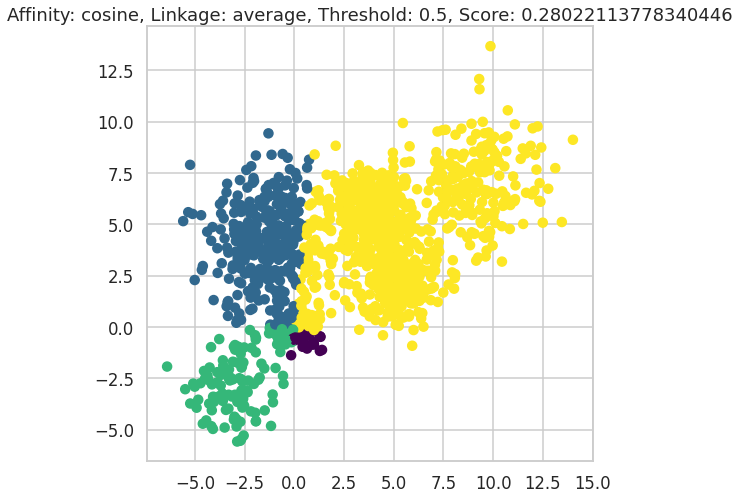

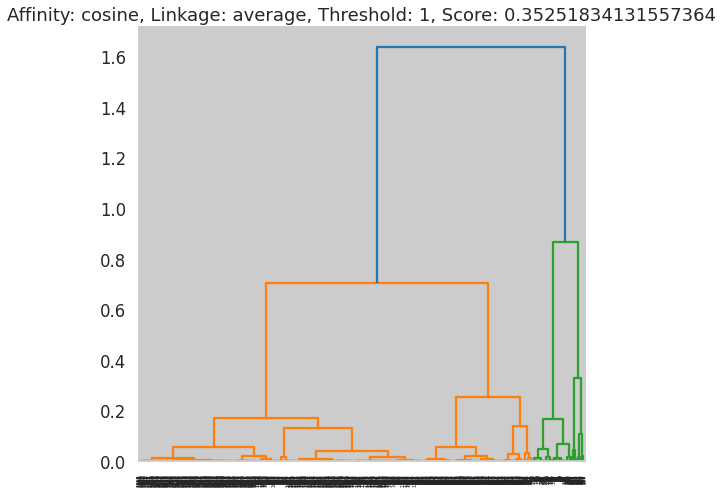

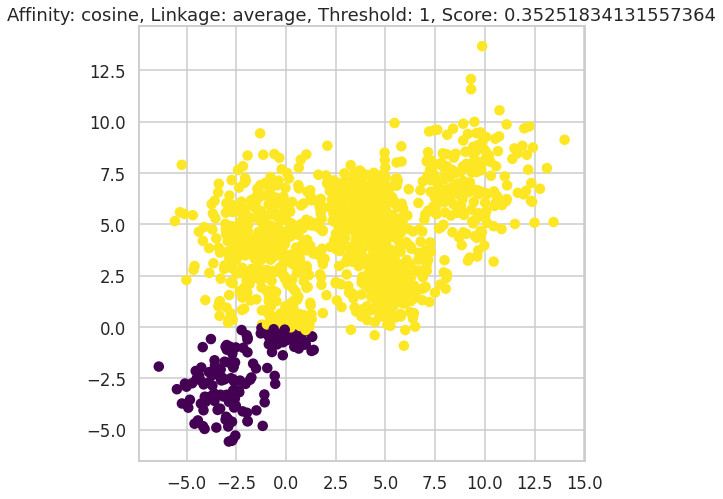

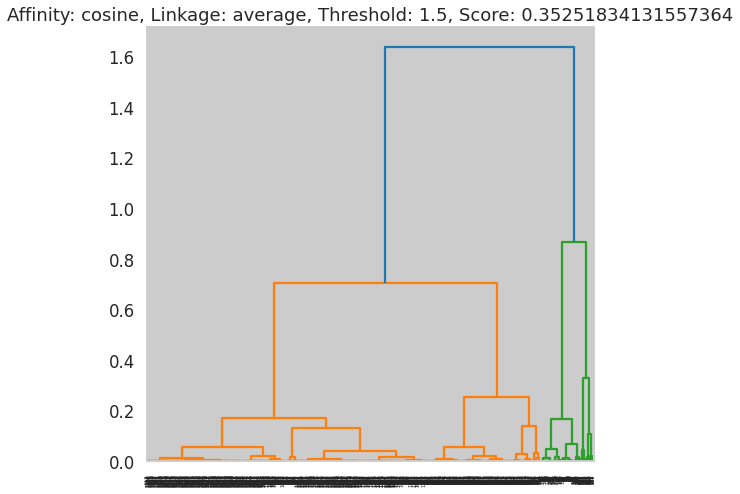

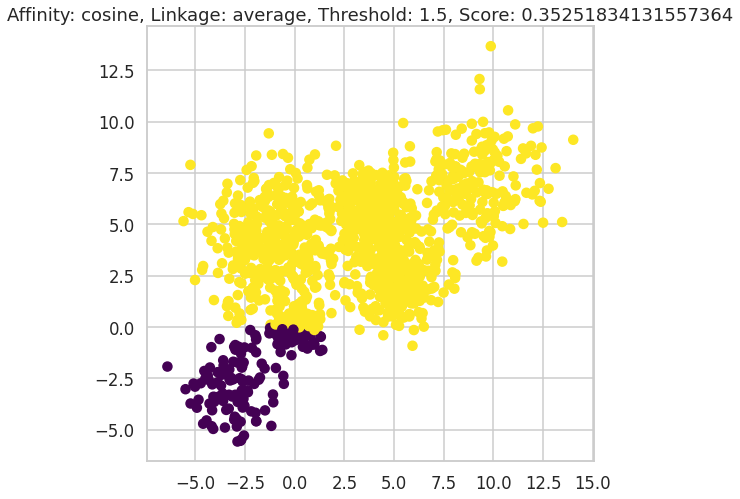

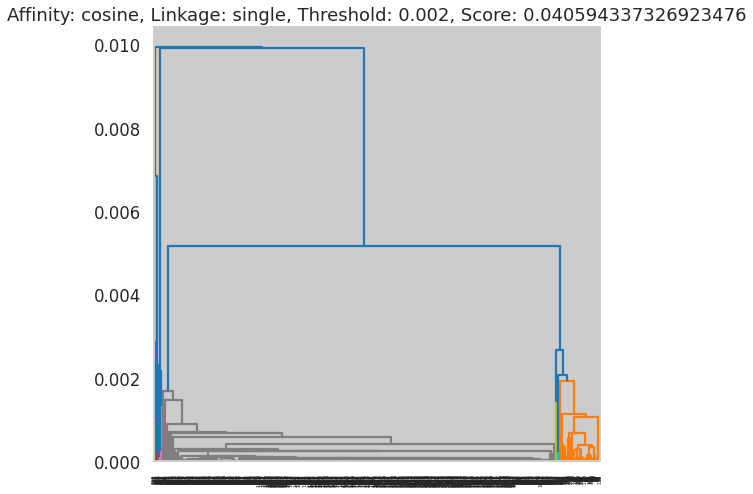

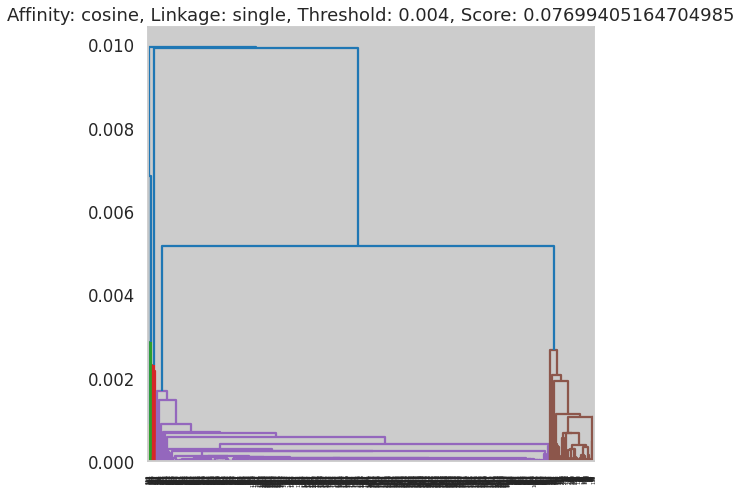

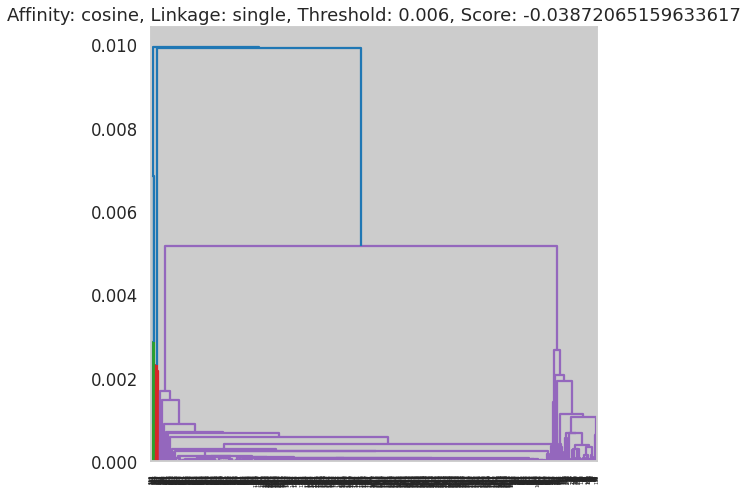

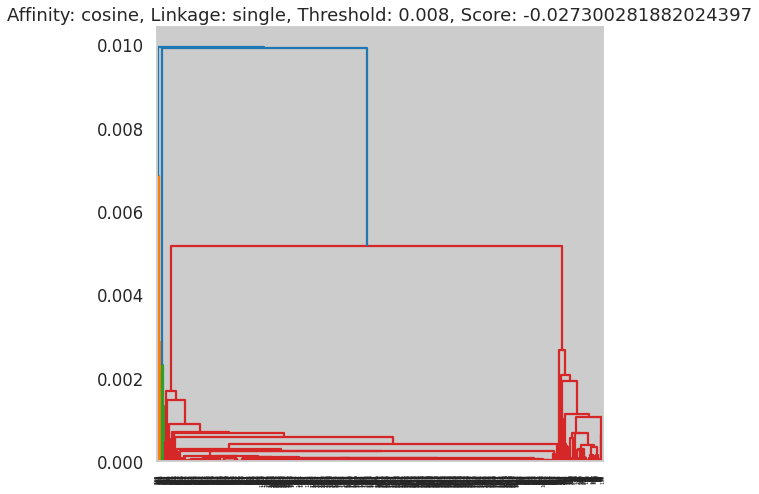

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# set the range of distance thresholds to try
thresholds = [2,4,6,7] # all average except cosine 
thresholds_single=[0.25,0.5,1,1.5] # all single and cosine average 
threshold_cosine_single=[0.002,0.004,0.006,0.008]

# set the range of affinity and linkage parameters to try
affinities = ['euclidean','cityblock','cosine'] 
linkages = ['average','single']

# initialize empty lists to store results
dendrograms = []
silhouette_scores = []
best_score = -1

# loop over each combination of parameters
for affinity in affinities:
    for linkage_type in linkages:
      if linkage_type =='average' and affinity!='cosine':
        for threshold in thresholds:
          
            # fit agglomerative clustering model with the current parameters
            model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=threshold)
            # scaler = MinMaxScaler(feature_range=(0, 1))
            # rescaled_data = scaler.fit_transform(Multi_blob_Data)

            model.fit(Multi_blob_Data)

            # calculate and store the silhouette score for the current parameters
            score = silhouette_score(Multi_blob_Data, model.labels_)
            silhouette_scores.append(score)

            # if the current score is the best so far, store the dendrogram for this model
            if score > best_score:
                best_score = score
                best_model = model
                best_params = {'affinity': affinity, 'linkage': linkage_type, 'threshold': threshold}

            # plot the dendrogram for the current model
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity) # create the link between two clusters 
            plt.figure()
            dendrogram(Z, color_threshold=threshold)
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()

             # plot the clustering result for the current model
            plt.figure()
            plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=model.labels_, cmap='viridis')
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()

      elif affinity=='cosine' and linkage_type =='single' :
        for threshold in threshold_cosine_single:
           # fit agglomerative clustering model with the current parameters
            model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=threshold)
            model.fit(Multi_blob_Data)

            # calculate and store the silhouette score for the current parameters
            score = silhouette_score(Multi_blob_Data, model.labels_)
            silhouette_scores.append(score)

            # if the current score is the best so far, store the dendrogram for this model
            if score > best_score:
                best_score = score
                best_model = model
                best_params = {'affinity': affinity, 'linkage': linkage_type, 'threshold': threshold}

            # plot the dendrogram for the current model
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)
            plt.figure()
            dendrogram(Z, color_threshold=threshold)
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()

             # plot the clustering result for the current model
            plt.figure()
            plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=model.labels_, cmap='viridis')
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()

      else:
        for threshold in thresholds_single:
           # fit agglomerative clustering model with the current parameters
            model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=threshold)
            model.fit(Multi_blob_Data)

            # calculate and store the silhouette score for the current parameters
            score = silhouette_score(Multi_blob_Data, model.labels_)
            silhouette_scores.append(score)

            # if the current score is the best so far, store the dendrogram for this model
            if score > best_score:
                best_score = score
                best_model = model
                best_params = {'affinity': affinity, 'linkage': linkage_type, 'threshold': threshold}

            # plot the dendrogram for the current model
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)
            plt.figure()
            dendrogram(Z, color_threshold=threshold)
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()
          
            # plot the clustering result for the current model
            plt.figure()
            plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=model.labels_, cmap='viridis')
            plt.title('Affinity: ' + affinity + ', Linkage: ' + linkage_type + ', Threshold: ' + str(threshold) + ', Score: ' + str(score))
            plt.show()

In [ ]:
# print the best parameters and silhouette score
print('Best Parameters:', best_params)
print('Best Silhouette Score:', best_score)

Best Parameters: {'affinity': 'euclidean', 'linkage': 'average', 'threshold': 7}
Best Silhouette Score: 0.4716908069861964


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

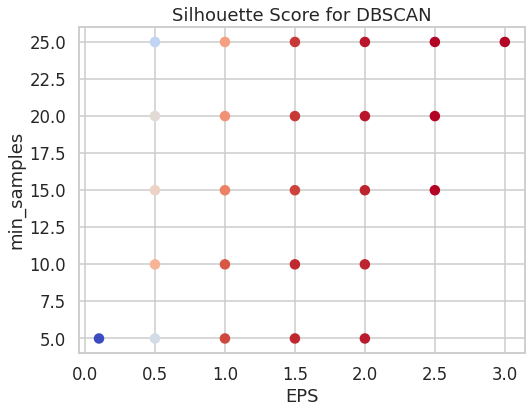

Best Parameters: (2.5, 15)
Best Silhouette Score: 0.4685207355522043


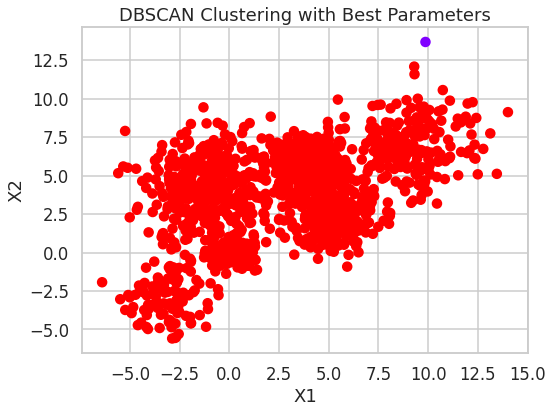

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# define the range of values for EPS and min_samples
eps_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
min_samples_values = [5, 10, 15, 20, 25]

# initialize an empty dictionary to store silhouette scores for each parameter combination
silhouette_scores = {}
# loop over all combinations of EPS and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # initialize a DBSCAN object with current parameters
        model = DBSCAN(eps=eps, min_samples=min_samples)
        # fit the model to the data
        model.fit(Multi_blob_Data)
        # calculate the silhouette score for the current parameter combination
        if len(set(model.labels_)) > 1: # check if the model has more than one cluster
            score = silhouette_score(Multi_blob_Data, model.labels_)
            # For each eps and min_samples, store the score in the dictionary
            silhouette_scores[(eps, min_samples)] = score

# plot the silhouette score versus the variation in EPS and min_samples
fig, ax = plt.subplots(figsize=(8, 6))
scores = list(silhouette_scores.values())
ax.scatter([x[0] for x in silhouette_scores.keys()], [x[1] for x in silhouette_scores.keys()], c=scores, cmap='coolwarm')
ax.set_xlabel('EPS')
ax.set_ylabel('min_samples')
ax.set_title('Silhouette Score for DBSCAN')
plt.show()

# find the best parameters based on the highest silhouette score
best_params = max(silhouette_scores, key=silhouette_scores.get) #find the best score and get its corresponding key
print('Best Parameters:', best_params)
print('Best Silhouette Score:', silhouette_scores[best_params])

# initialize a DBSCAN object with the best parameters
dbscan_best = DBSCAN(eps=best_params[0], min_samples=best_params[1])
# fit the model to the data
dbscan_best.fit(Multi_blob_Data)
# plot the resulting clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = dbscan_best.labels_
ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=colors, cmap='rainbow')
ax.set_title('DBSCAN Clustering with Best Parameters')
plt.show()


*italicized text*### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

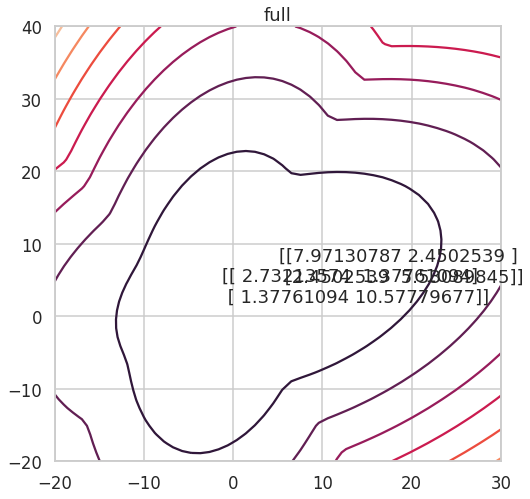

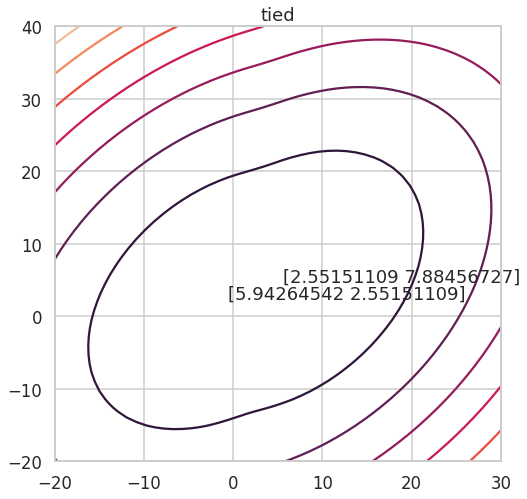

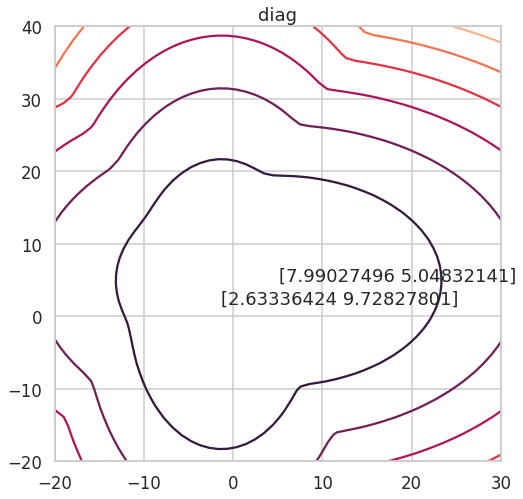

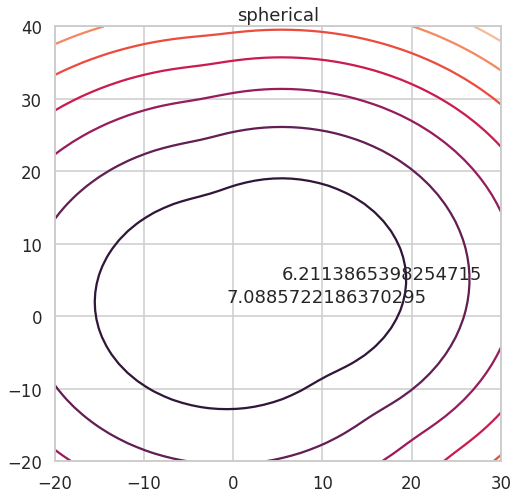

best score:
0.4746189699249217


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# define the range of covariance types to try
cov_types = ['full', 'tied', 'diag', 'spherical']

# initialize an empty dictionary to store GMM models for each covariance type
gmms = {}
silhouette_scores=[]
best_score = -1
# loop over all covariance types
for cov_type in cov_types:
    # initialize a GMM object with current covariance type
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type)
    # fit the model to the data
    gmm.fit(Multi_blob_Data)
    # store the model in the dictionary
    gmms[cov_type] = gmm

    score = silhouette_score(Multi_blob_Data, gmm.predict(Multi_blob_Data))
    silhouette_scores.append(score)

              
    if score > best_score:
            best_score = score

    plt.show()
    
    x = np.linspace(-20.0, 30.0)
    y = np.linspace(-20.0, 40.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = - gmm.score_samples(XX)
    Z = Z.reshape(X.shape)

    plt.contour(X, Y, Z)
    cn = np.transpose(gmm.means_)


    for i in range(len(cn)):
        plt.text(cn[0][i], cn[1][i], gmm.covariances_[i])
        
    plt.title(cov_type)
    plt.show()
print("best score:")
print(best_score)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()["data"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_norm = scaler.fit_transform(iris_data)

# perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_norm) # select only first two features



In [ ]:
kmeans_guc(iris_pca)

Best K: 2
Best Silhouette Score: 0.6145202036222636


In [ ]:
hierarchical(iris_pca)

Best Parameters: {'affinity': 'cosine', 'linkage': 'average', 'threshold': 1}
Best Silhouette Score: 0.6097421324254194


In [ ]:
dbscan(iris_pca)

Best Parameters: (1.5, 5)
Best Silhouette Score: 0.6145202036222636


In [ ]:
mixture(iris_pca)

best score:
0.6145202036222636


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
# load the data from the CSV file
data = pd.read_csv('Customer data.csv')

# extract the feature vectors from the data
X = data.iloc[:, 1:].values


In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [ ]:
kmeans_guc(X_pca)

Best K: 3
Best Silhouette Score: 0.4321756594180618


In [ ]:
hierarchical(X_pca)

Best Parameters: {'affinity': 'euclidean', 'linkage': 'single', 'threshold': 1}
Best Silhouette Score: 0.5154196393651911


In [ ]:
dbscan(X_pca)

Best Parameters: (1, 5)
Best Silhouette Score: 0.5154196393651914


In [ ]:
mixture(X_pca)

best score:
0.39722023742741874
